This is feature selection with correlation table

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [5]:
#Load data
data = pd.read_csv('rent_clean.csv')
test = data[['price_per_sqm',  'apartment', 'number_of_whole_rooms', 'number_of_half_rooms', 'floor', 'lift', 'air_conditioner', 'furnish_furnished', 'view_garden', 'view_panoramic', 'view_street', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'district_i', 'district_ii', 'district_iii', 'district_iv', 'district_v', 'district_vi', 'district_vii', 'district_viii', 'district_ix', 'district_x', 'district_xi', 'district_xii','district_xiii', 'district_xiv', 'district_xv', 'district_xvi', 'district_xvii', 'district_xviii', 'district_xix', 'district_xx', 'district_xxi', 'district_xxii', 'district_xxiii']]
test = test.dropna()



In [7]:
X = test[['apartment', 'number_of_whole_rooms', 'number_of_half_rooms', 'floor', 'lift', 'air_conditioner', 'furnish_furnished', 'view_garden', 'view_panoramic', 'view_street', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'district_i', 'district_ii', 'district_iii', 'district_iv', 'district_v', 'district_vi', 'district_vii', 'district_viii', 'district_ix', 'district_x', 'district_xi', 'district_xii','district_xiii', 'district_xiv', 'district_xv', 'district_xvi', 'district_xvii', 'district_xviii', 'district_xix', 'district_xx', 'district_xxi', 'district_xxii', 'district_xxiii']]
y = test[['price_per_sqm']]


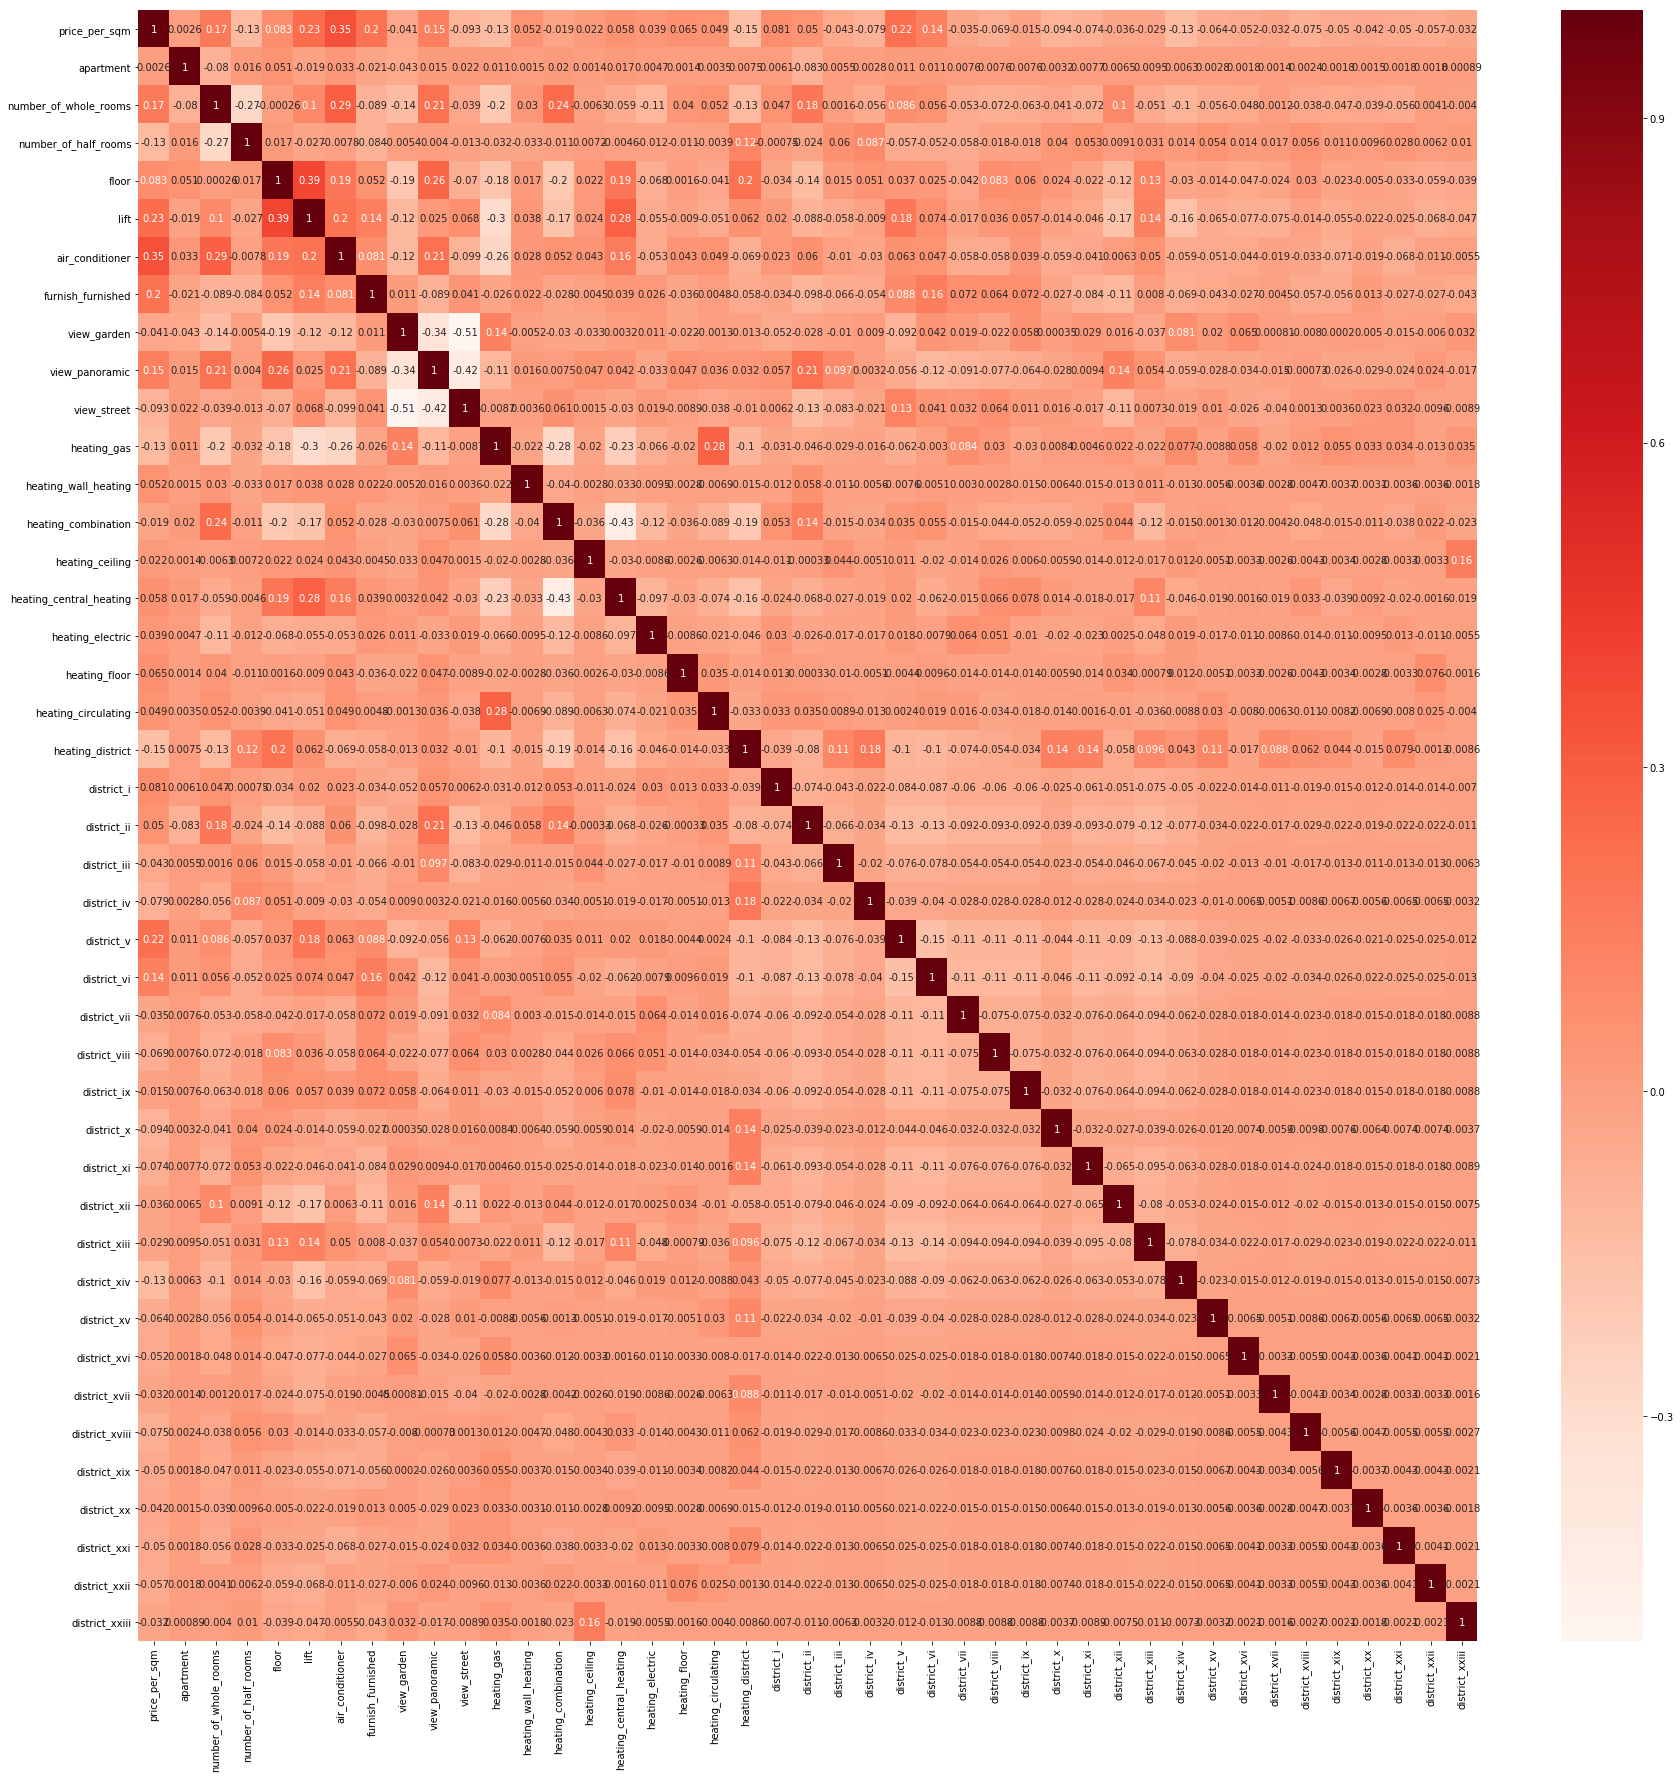

In [15]:
#Correlation heatmap
#Pearson correlation
plt.figure(figsize = (30, 30))
cor = test.corr()
hm = sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()
figure = hm.get_figure()    
figure.savefig('cor_hm.png')


In [16]:
#Correlation with output variable
cor_target = abs(cor['price_per_sqm'])

#Select highly correlated features
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)


price_per_sqm            1.000000
number_of_whole_rooms    0.173075
number_of_half_rooms     0.128163
lift                     0.232573
air_conditioner          0.351487
furnish_furnished        0.203065
view_panoramic           0.146811
heating_gas              0.131753
heating_district         0.147718
district_v               0.220169
district_vi              0.138163
district_xiv             0.133547
Name: price_per_sqm, dtype: float64


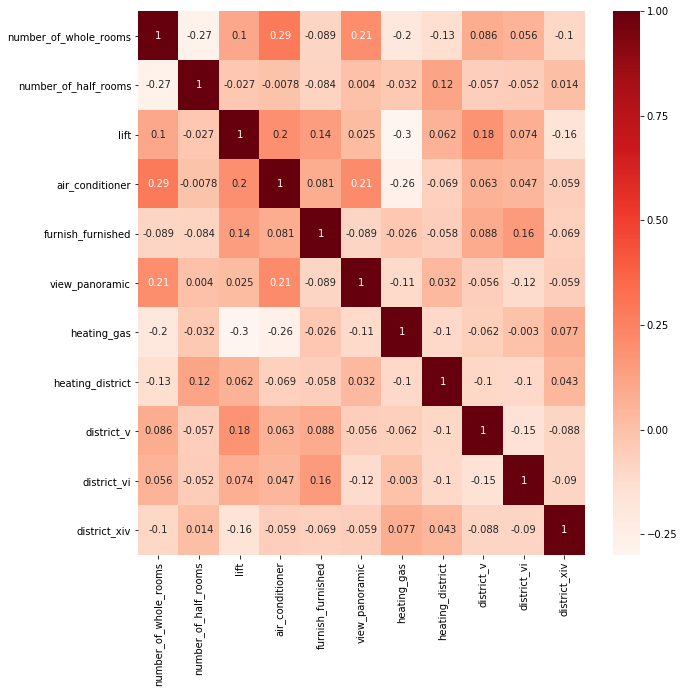

In [17]:
#The independent variables need to be uncorrelated with each other
plt.figure(figsize = (10, 10))
test_1 = test[['number_of_whole_rooms', 'number_of_half_rooms', 'lift', 'air_conditioner', 'furnish_furnished', 'view_panoramic', 'heating_gas', 'heating_district', 'district_v', 'district_vi', 'district_xiv']]
cor = test_1.corr()
hm_1 = sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()
figure = hm_1.get_figure()    
figure.savefig('var_cor_hm.png')
